In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams

# 1-More about sampling points

#### Solution to samping points on a torus.
We can sample points on a torus of radius $b$ and radius of the tube $a$, by generating two random angles $\phi$ and $\theta$ and using the equations: 

$$\begin{cases}
x=(b+a\cos(\phi))\cos(\theta)\\
y=(b+a\cos(\phi))\sin(\theta)\\
z=a\sin(\phi)
\end{cases}.$$

### Exercise.
#### 1-Check that the torus is given by the equation 
$$\left(b-\sqrt{x^2+y^2}\right)^2+z^2=a^2.$$

The following code samples points on a torus of $a=1$ and $b=2$.

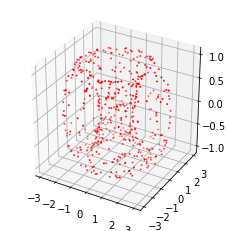

In [6]:
#torus0 is a list of points on the torus
torus0=np.array([[(math.cos(phi[0])+2)*math.cos(phi[1]),(math.cos(phi[0])+2)*math.sin(phi[1]),math.sin(phi[0])] for phi in 2*math.pi*np.random.random((500,2))])

xin = [pt[0] for pt in torus0]
yin = [pt[1] for pt in torus0]
zin = [pt[2] for pt in torus0] 
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.scatter(xin, yin, zin, s=1,zorder=10,c='r')

### Exercise
#### 2- Use ```ripser```on $\texttt{torus0}$ to confirm the Betti numbers of the torus. Change the number of sampled points compare the performance. 

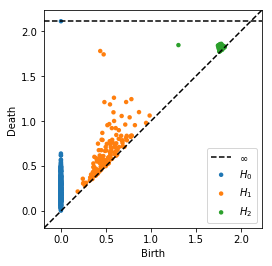

In [7]:
#your code here
ph_torus = ripser(torus0,maxdim=2)['dgms']
plot_diagrams(ph_torus, show=True)

#### 3- Now change the inner radius and the outer radius and compare the performance. 

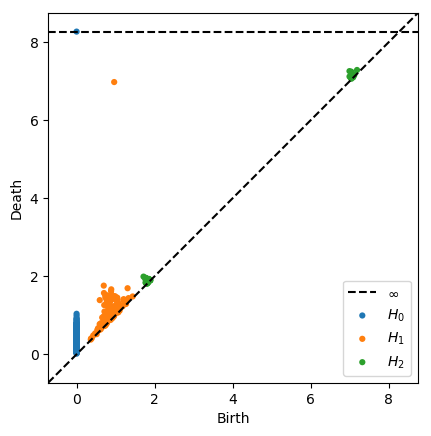

In [10]:
#your code here
torus_15=np.array([[(math.cos(phi[0])+5)*math.cos(phi[1]),(math.cos(phi[0])+5)*math.sin(phi[1]),math.sin(phi[0])] for phi in 2*math.pi*np.random.random((500,2))])
ph_torus_15 = ripser(torus_15,maxdim=2)['dgms']
plot_diagrams(ph_torus_15, show=True)

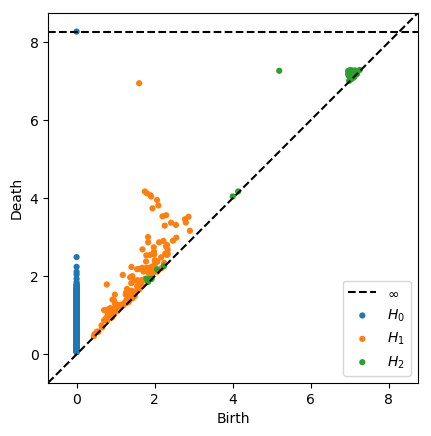

In [9]:
torus_45=np.array([[(4*math.cos(phi[0])+5)*math.cos(phi[1]),(4*math.cos(phi[0])+5)*math.sin(phi[1]),4*math.sin(phi[0])] for phi in 2*math.pi*np.random.random((500,2))])
ph_torus_45 = ripser(torus_45,maxdim=2)['dgms']
plot_diagrams(ph_torus_45, show=True)

### Bent circle. 
Topological invariants don't change under continuous transformations. The following example generates points on a bent circle. Then it checks that the persistent homology is equal to the one of a circle. 

Text(0.5, 1.0, 'Persistence')

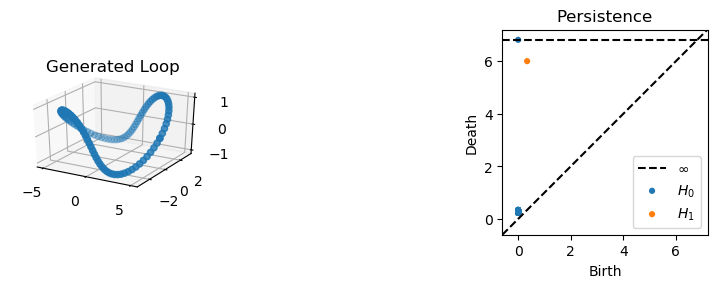

In [7]:
## Step 1: Setup curve
N = 100 # Number of points to sample
R = 4   # Big radius of torus
r = 1   # Little radius of torus
X = np.zeros((N, 3))
t = np.linspace(0, 2*np.pi, N)
X[:, 0] = (R + r*np.cos(2*t))*np.cos(t)
X[:, 1] = (R + r*np.cos(2*t))*np.sin(t)
X[:, 2] = r*np.sin(2*t)

## Step 2: Compute persistent homology
dgms2 = ripser(X)['dgms']


fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_aspect('equal')
plt.title("Generated Loop")
plt.subplot(133)
plot_diagrams(dgms2)
plt.title("Persistence")

# 2- Clustering

One of the applications we discussed about persistent homology is clustering. Clustering is the task of grouping a set of objects in such a way that objects in the same group are closer to each other. However, as we will see, persistent homology is not the most tool for clustering and has some pitfalls. In the following examples the data is read from a file using ```np.loadtxt()```.

[[151700. 351102.]
 [155799. 354358.]
 [142857. 352716.]
 ...
 [546754. 394768.]
 [541605. 396515.]
 [527319. 397961.]]


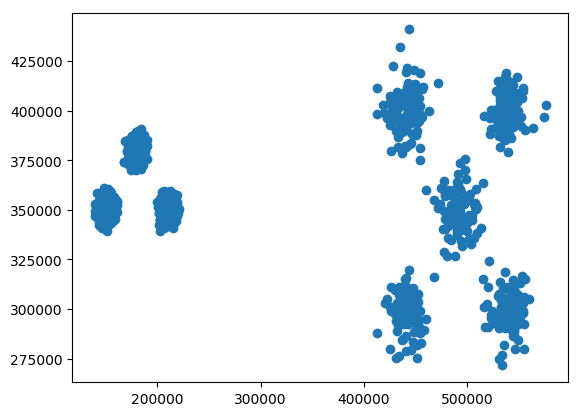

In [13]:
#read data from text file
data_example=np.loadtxt('clusters1.txt')
#check data has been read properly
print(data_example)
#plot data
plt.plot(data_example[:,0],data_example[:,1],'o')

### Exercise
#### 4- We focus first on the three leftmost clusters. Plot the persistence diagram of the data points belonging to these clusters and comment on the performance. Does persitent homology predict 3 clusters?

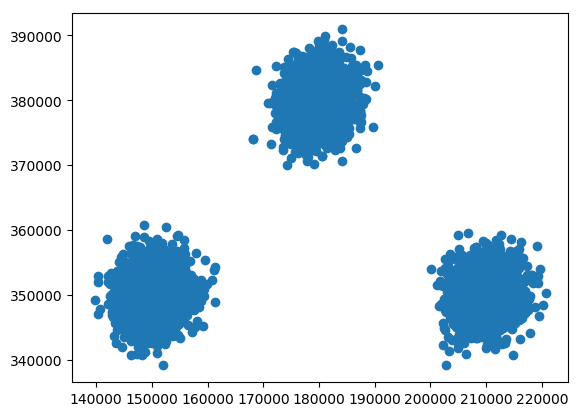

In [14]:
#the array sub1 selects the points in data_example with x coordinate <300000 (the three clusters to the left)
sub_left=np.array([pt for pt in data_example if pt[0]<300000])
plt.plot(sub_left[:,0],sub_left[:,1],'o')

In [ ]:
#add your code here
ph_left = ripser(sub_left,maxdim=2)['dgms']
plot_diagrams(ph_left, show=True)

#### 5- Do the same for the rightmost points. 

In [ ]:
#the array sub1 selects the points in data_example with x coordinate <300000 (the three clusters to the left)
sub_right=np.array([pt for pt in data_example if pt[0]>300000])
plt.plot(sub_right[:,0],sub_right[:,1],'o')

In [ ]:
#add your code here
ph_right = ripser(sub_left,maxdim=2)['dgms']
plot_diagrams(ph_left, show=True)

#### Which performance is better?

The fist one. In fact, this clustering method on the right set of data doesn't even detect. 

### Exercise
#### 6- You can find  more clustering data in http://cs.joensuu.fi/sipu/datasets/. Choose a data set and use persistent homology to find the number of clusters. 

# 3- Other methods in image processing. Edge detection.

To install this package, run ```pip install opencv-python``` in your termial. The method below takes an image in gray scale and returns a black image with white dots where the edges where detected. 

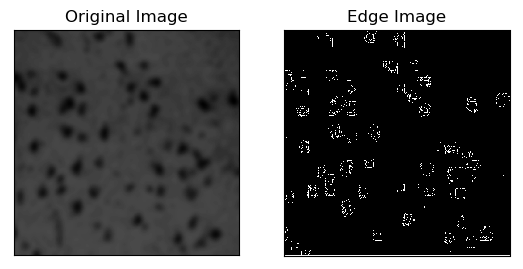

In [57]:
import cv2

img = cv2.imread('cell_blur.png',0)
edges = cv2.Canny(img,0,12)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Exercise.
#### 7-Combine the edge detection with persitent homology to count the number of cells. 